# MODULE 1: Dataset Overview and Visualization

Detected Classes: ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']
clear face: 97 images
darkspots: 99 images
puffy eyes: 101 images
wrinkles: 100 images


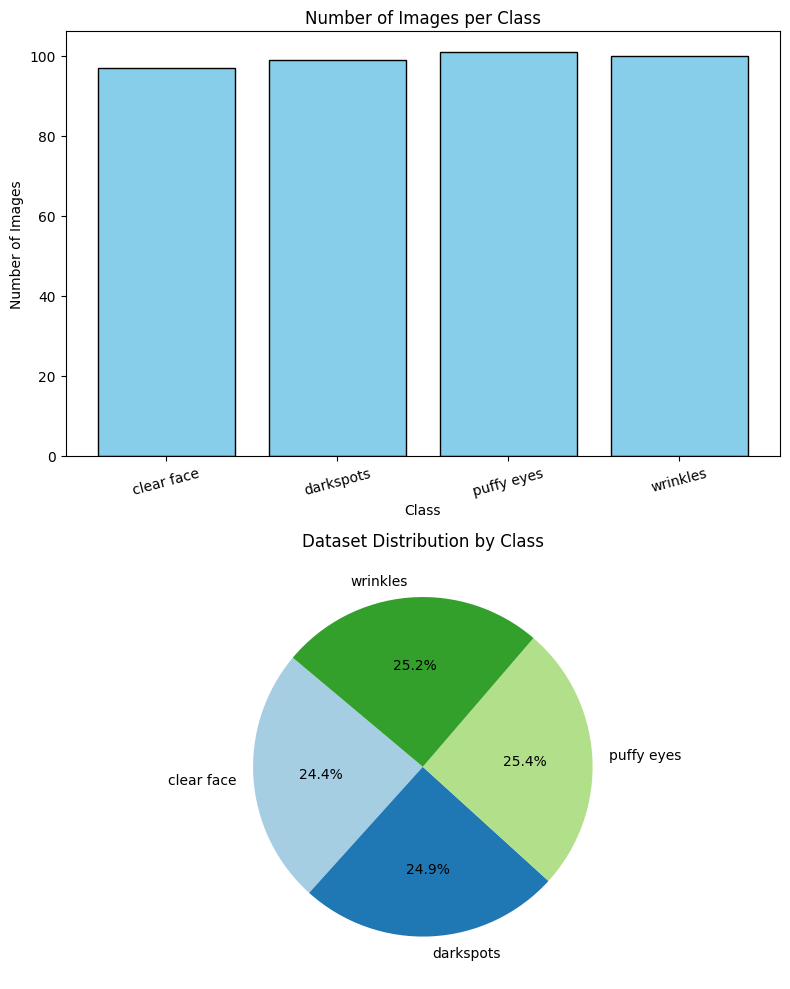

Module 1: Visualization completed successfully!


In [3]:
import os
import matplotlib.pyplot as plt

# ------------------ Step 1: Define Dataset Path ------------------
dataset_path = r"C:\Users\LENOVO\Downloads\infosys_project\images_types"

# ------------------ Step 2: Detect Classes ------------------
classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print("Detected Classes:", classes)

# ------------------ Step 3: Count Images per Class ------------------
class_counts = {}
for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    images = [img_file for img_file in os.listdir(cls_path)
              if img_file.lower().endswith(('.jpg', '.jpeg', '.png'))]
    class_counts[cls] = len(images)
    print(f"{cls}: {len(images)} images")

# ------------------ Step 4: Visualize Dataset Distribution ------------------
plt.figure(figsize=(8, 10))

# Bar chart
plt.subplot(2, 1, 1)
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', edgecolor='black')
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=15)

# Pie chart
plt.subplot(2, 1, 2)
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%',
        startangle=140, colors=plt.cm.Paired.colors)
plt.title("Dataset Distribution by Class")

plt.tight_layout()
plt.show()

print("Module 1: Visualization completed successfully!")


# MODULE-2(Data Preprocessing)

Found 319 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


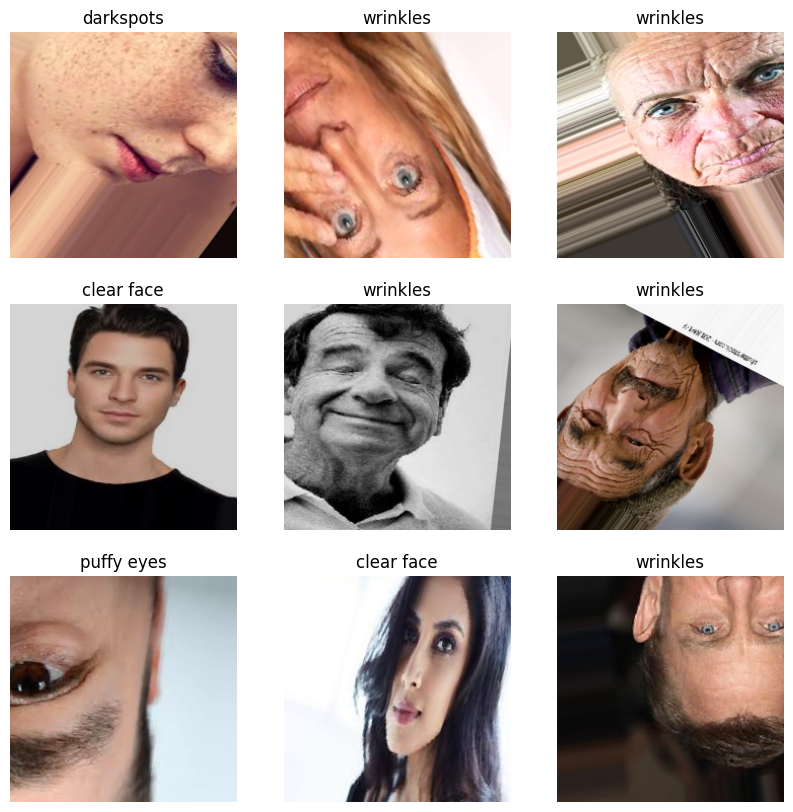

Module 2: Preprocessing done successfully


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation + preprocessing
train_datagen = ImageDataGenerator(
     rescale=1/255,
    rotation_range=40,          
    width_shift_range=0.3,        
    height_shift_range=0.3,
    zoom_range=0.3,              
    horizontal_flip=True,
    vertical_flip=True,          
    brightness_range=[0.8, 1.2], 
    validation_split=0.2
)

# Training set
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',  
    shuffle=True,
    subset='training'
)

# Validation set
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb', 
    shuffle=False,
    subset='validation'
)

# Display some augmented images
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.title(list(train_generator.class_indices.keys())[y_batch[i].argmax()])
    plt.axis("off")
plt.show()
print("Module 2: Preprocessing done successfully")


# MODULE-3(Using Model InceptionV3)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3069 - loss: 2.0664

10/10 ━━━━━━━━━━━━━━━━━━━━ 170s 14s/step - accuracy: 0.3918 - loss: 1.6800 - val_accuracy: 0.3846 - val_loss: 1.3543 - learning_rate: 1.0000e-04
Epoch 2/50
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1:50 12s/step - accuracy: 0.5000 - loss: 1.3956Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5770 - loss: 1.2464

10/10 ━━━━━━━━━━━━━━━━━━━━ 97s 9s/step - accuracy: 0.6050 - loss: 1.1373 - val_accuracy: 0.5385 - val_loss: 1.0885 - learning_rate: 1.0000e-04
Epoch 3/50
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7417 - loss: 0.8690

10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 8s/step - accuracy: 0.7210 - loss: 0.8210 - val_accuracy: 0.6282 - val_loss: 1.0446 - learning_rate: 1.0000e-04
Epoch 4/50
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6953 - loss: 0.9324

10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.7022 - loss: 0.8745 - val_accuracy: 0.6538 - val_loss: 0.9950 - learning_rate: 1.0000e-04
Epoch 5/50
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7889 - loss: 0.6098

10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.7618 - loss: 0.7254 - val_accuracy: 0.7179 - val_loss: 0.8944 - learning_rate: 1.0000e-04
Epoch 6/50
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 7s/step - accuracy: 0.8213 - loss: 0.5652 - val_accuracy: 0.6923 - val_loss: 0.8072 - learning_rate: 1.0000e-04
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 7s/step - accuracy: 0.8213 - loss: 0.5652 - val_accuracy: 0.6923 - val_loss: 0.8072 - learning_rate: 1.0000e-04
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7455 - loss: 0.7631

10/10 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 0.7743 - loss: 0.7146 - val_accuracy: 0.7564 - val_loss: 0.7162 - learning_rate: 1.0000e-04
Epoch 8/50
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 6s/step - accuracy: 0.8245 - loss: 0.5301 - val_accuracy: 0.6667 - val_loss: 0.8502 - learning_rate: 1.0000e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 6s/step - accuracy: 0.8245 - loss: 0.5301 - val_accuracy: 0.6667 - val_loss: 0.8502 - learning_rate: 1.0000e-04
Epoch 9/50
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.8150 - loss: 0.5038 - val_accuracy: 0.6795 - val_loss: 0.7685 - learning_rate: 1.0000e-04
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.8150 - loss: 0.5038 - val_accuracy: 0.6795 - val_loss: 0.7685 - learning_rate: 1.0000e-04
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.8276 - loss: 0.4905 - val_accuracy: 0.7051 - val_loss: 0.8698 - learning_rate: 1.0000e-04
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.8276 - lo

10/10 ━━━━━━━━━━━━━━━━━━━━ 149s 9s/step - accuracy: 0.8182 - loss: 0.5809 - val_accuracy: 0.7692 - val_loss: 0.6408 - learning_rate: 2.0000e-05
Epoch 13/50
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 8s/step - accuracy: 0.8464 - loss: 0.4271 - val_accuracy: 0.6923 - val_loss: 0.7655 - learning_rate: 2.0000e-05
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 8s/step - accuracy: 0.8464 - loss: 0.4271 - val_accuracy: 0.6923 - val_loss: 0.7655 - learning_rate: 2.0000e-05
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 8s/step - accuracy: 0.7837 - loss: 0.5144 - val_accuracy: 0.7564 - val_loss: 0.7275 - learning_rate: 2.0000e-05
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 8s/step - accuracy: 0.7837 - loss: 0.5144 - val_accuracy: 0.7564 - val_loss: 0.7275 - learning_rate: 2.0000e-05
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step - accuracy: 0.8558 - loss: 0.4411 - val_accuracy: 0.7179 - val_loss: 0.7075 - learning_rate: 2.0000e-05
Epoch 16/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step - accuracy: 0.85

10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 7s/step - accuracy: 0.8558 - loss: 0.4076 - val_accuracy: 0.8077 - val_loss: 0.6230 - learning_rate: 2.0000e-05
Epoch 17/50
Epoch 17/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - accuracy: 0.8621 - loss: 0.3931 - val_accuracy: 0.7949 - val_loss: 0.6911 - learning_rate: 2.0000e-05
Epoch 18/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - accuracy: 0.8621 - loss: 0.3931 - val_accuracy: 0.7949 - val_loss: 0.6911 - learning_rate: 2.0000e-05
Epoch 18/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.8809 - loss: 0.3027 - val_accuracy: 0.7436 - val_loss: 0.6968 - learning_rate: 2.0000e-05
Epoch 19/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.8809 - loss: 0.3027 - val_accuracy: 0.7436 - val_loss: 0.6968 - learning_rate: 2.0000e-05
Epoch 19/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 233s 25s/step - accuracy: 0.8433 - loss: 0.4758 - val_accuracy: 0.8077 - val_loss: 0.6000 - learning_rate: 2.0000e-05
Epoch 20/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 233s 25s/step - accuracy: 0.8

10/10 ━━━━━━━━━━━━━━━━━━━━ 109s 11s/step - accuracy: 0.8809 - loss: 0.3375 - val_accuracy: 0.8205 - val_loss: 0.6460 - learning_rate: 4.0000e-06
Epoch 25/50
Epoch 25/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.8746 - loss: 0.3480 - val_accuracy: 0.7564 - val_loss: 0.6964 - learning_rate: 4.0000e-06
Epoch 26/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.8746 - loss: 0.3480 - val_accuracy: 0.7564 - val_loss: 0.6964 - learning_rate: 4.0000e-06
Epoch 26/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.8370 - loss: 0.4571 - val_accuracy: 0.7821 - val_loss: 0.5841 - learning_rate: 4.0000e-06
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.8370 - loss: 0.4571 - val_accuracy: 0.7821 - val_loss: 0.5841 - learning_rate: 4.0000e-06
Epoch 27/50
Epoch 27/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.8527 - loss: 0.3657 - val_accuracy: 0.7564 - val_loss: 0.6112 - learning_rate: 4.0000e-06
Epoch 28/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.852

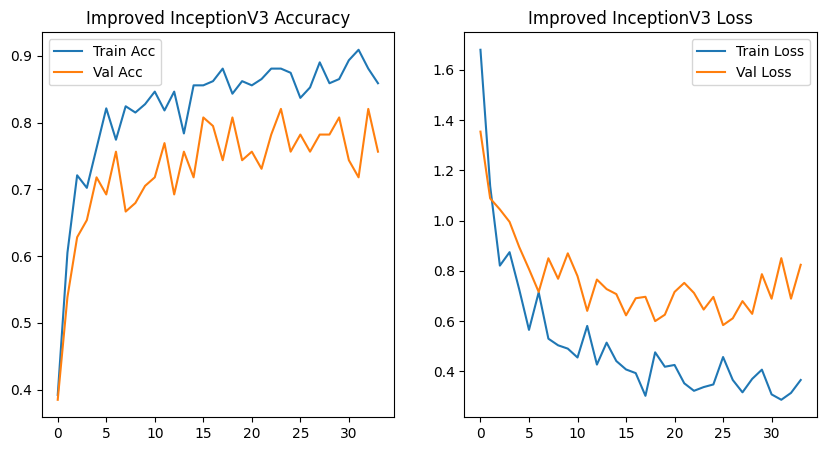

✅ Improved InceptionV3 model training completed and saved!


In [7]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Base model setup
input_shape = (224, 224, 3)
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)

# Unfreeze last 60 layers for deeper fine-tuning
for layer in base_model.layers[:-60]:
    layer.trainable = False
for layer in base_model.layers[-60:]:
    layer.trainable = True

# Model head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
preds = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

# Optimizer with smaller learning rate
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ModelCheckpoint("best_inceptionv3_model2.h5", save_best_only=True, monitor='val_accuracy'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, verbose=1)
]

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

# ------------------ Evaluate and Visualize ------------------
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Improved InceptionV3 Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Improved InceptionV3 Loss")
plt.legend()
plt.show()

print("✅ Improved InceptionV3 model training completed and saved!")


# MODULE 4: Enhanced Face Detection and Prediction Pipeline

✅ Full model (architecture + weights) loaded successfully!
✅ Haar Cascade loaded successfully!
Detected Classes: ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']
Prediction: wrinkles (99.90%) | Age: >60


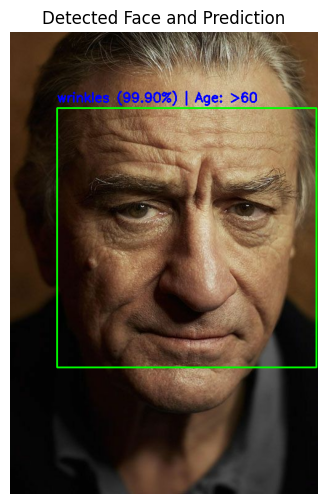

Prediction: clear face (53.33%) | Age: 27


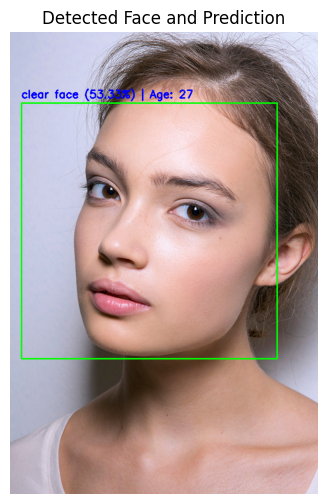

Prediction: puffy eyes (50.74%) | Age: 44


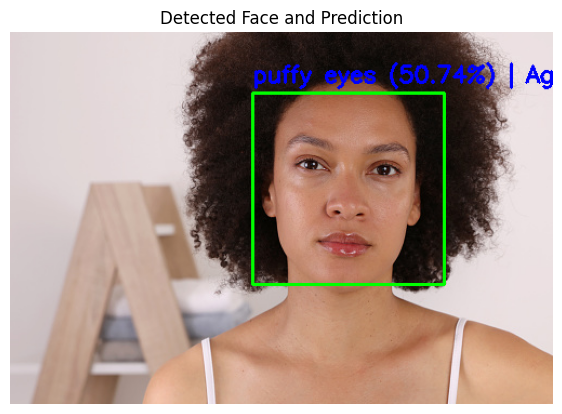

Prediction: darkspots (77.68%) | Age: 35


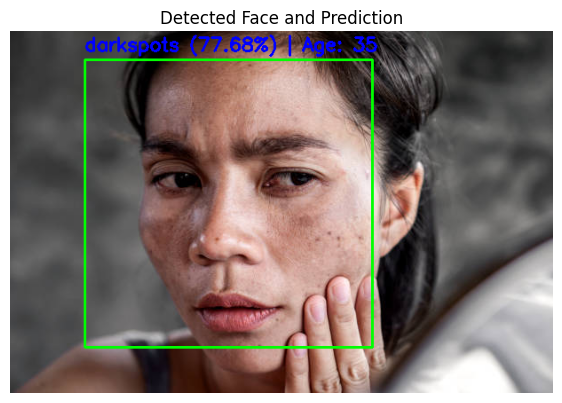

✅ Module 4: Detection and Age Prediction completed successfully!


In [ ]:
import os
import cv2
import h5py
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input

# ------------------ Step 1: Check Model File ------------------
model_path = "best_inceptionv3_model2.h5"

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at: {model_path}")

# ------------------ Step 2: Try Loading Full Model ------------------
try:
    model = load_model(model_path)
    print("✅ Full model (architecture + weights) loaded successfully!")

except Exception as e:
    print(f"⚠️ Full model load failed due to: {e}")
    print("Rebuilding architecture manually and loading weights instead...")

    input_shape = (224, 224, 3)
    base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    predictions = Dense(4, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.load_weights(model_path)
    print("✅ Model architecture rebuilt and weights loaded successfully!")

# ------------------ Step 3: Load Haar Cascade ------------------
haar_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(haar_path)
print("✅ Haar Cascade loaded successfully!")

# ------------------ Step 4: Define Class Labels ------------------
class_names = ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']
print("Detected Classes:", class_names)

# ------------------ Step 5: Face Detection and Prediction Function ------------------
def detect_and_predict(image_path):
    if not os.path.exists(image_path):
        print(f"❌ Image not found: {image_path}")
        return

    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Unable to load image: {image_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=3)

    # Fallback to full image if no faces detected
    if len(faces) == 0:
        h, w = img.shape[:2]
        faces = [(0, 0, w, h)]
        print("⚠️ No faces detected using Haar Cascade — using full image for prediction.")

    for (x, y, w, h) in faces:
        face = img[y:y+h, x:x+w]
        if face.size == 0:
            continue

        # Preprocess image for model
        face_resized = cv2.resize(face, (224, 224))
        face_array = img_to_array(face_resized)
        face_array = np.expand_dims(face_array, axis=0)
        face_array = preprocess_input(face_array)

        # Make prediction
        preds = model.predict(face_array, verbose=0)[0]
        pred_class = np.argmax(preds)
        confidence = preds[pred_class] * 100
        skin_condition = class_names[pred_class]

        # ------------------ Add Estimated Age Range ------------------
        if skin_condition == "clear face":
            est_age = randint(18, 30)
        elif skin_condition == "darkspots":
            est_age = randint(30, 40)
        elif skin_condition == "puffy eyes":
            est_age = randint(40, 55)
        else:
            est_age = ">60"

        label = f"{skin_condition} ({confidence:.2f}%) | Age: {est_age}"

        # Draw rectangle and label
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

        print(f"Prediction: {label}")

    # Display result
    plt.figure(figsize=(7, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Face and Prediction")
    plt.show()


# ------------------ Step 6: Test ------------------
test_images = [
    r"C:\Users\LENOVO\Downloads\infosys_project\images_types\wrinkles\2.jpg",
    r"C:\Users\LENOVO\Downloads\infosys_project\images_types\clear face\2.jpg",
    r"C:\Users\LENOVO\Downloads\infosys_project\images_types\puffy eyes\7.jpg",
    r"C:\Users\LENOVO\Downloads\infosys_project\images_types\darkspots\40.jpg"
]

for path in test_images:
    detect_and_predict(path)

print("✅ Module 4: Detection and Age Prediction completed successfully!")


In [ ]:
!streamlit run app.py